In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-transactions-dataset/Retail_Transactions_Dataset.csv


In [2]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd

# Veri setini yükleyelim
df = pd.read_csv('/kaggle/input/retail-transactions-dataset/Retail_Transactions_Dataset.csv')

# İlk birkaç satırı görelim
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [3]:
# Veri seti hakkında genel bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


Veri setimizde 1000000 satır ve 13 sütun olduğunu ve bunların hangi formatta olduğunu görüyoruz. Bu adımda "Promotion" sütununda eksik veri olduğunu görebiliyoruz ama bir sonraki satırda bunun kontrolünün nasıl yapıldığına dair bir adım daha ekliyorum. Ayrıca burada "Date" sütunumuz 'object' olarak kaydedilmiş, bu sütunu zamanla ilgili analizler yapabilmek için 'datetime' formatına dönüştürmemiz gerekecek. Bunların dışında, "Payment_Method", "City", "Store_Type", "Customer_Category", "Season" ve "Promotion" sütunları kategorik veriler içerdiğinden bunları sayısal hale dönüştüreceğiz. Bunu yapmamızdaki amaç makine öğrenmesi algoritmalarının sayısal verilerle çalışıyor olmasıdır.

In [4]:
# Eksik veri kontrolü
df.isnull().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

Eksik veri var mı diye kontrol ettiğimizde "Promotion" sütununda 333943 tane eksik veri olduğunu görebiliyoruz.

In [5]:
# Temel istatistiksel bilgiler
df.describe()

,Transaction_ID,Total_Items,Total_Cost
count,1.000000e+06,1000000.000000,1000000.000000
mean,1.000500e+09,5.495941,52.455220
std,2.886753e+05,2.871654,27.416989
min,1.000000e+09,1.000000,5.000000
25%,1.000250e+09,3.000000,28.710000
50%,1.000500e+09,5.000000,52.420000
75%,1.000750e+09,8.000000,76.190000
max,1.001000e+09,10.000000,100.000000


In [6]:
# Promotion sütunundaki eksik değerleri 'None' ile dolduralım
df['Promotion'] = df['Promotion'].fillna('None')

In [7]:
# Date sütununu datetime formatına çevirelim
df['Date'] = pd.to_datetime(df['Date'])

# Tarih sütunundaki ilk birkaç değere göz atalım
df['Date'].head()

0   2022-01-21 06:27:29
1   2023-03-01 13:01:21
2   2024-03-21 15:37:04
3   2020-10-31 09:59:47
4   2020-12-10 00:59:59
Name: Date, dtype: datetime64[ns]

In [8]:
# Kategorik sütunları One-Hot Encoding ile sayısal hale getirelim
df = pd.get_dummies(df, columns=['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion'], drop_first=True)

# Yeni tabloyu kontrol edelim
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Discount_Applied,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Mobile Payment,...,Customer_Category_Retiree,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Spring,Season_Summer,Season_Winter,Promotion_Discount on Selected Items,Promotion_None
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,True,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,True,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,False,False,True,False,...,False,False,False,False,True,False,False,True,True,False


One-Hot Encoding yapmasaydık ne olurdu, deneyerek öğrendim. O yüzden bahsetmeden geçmek istemiyorum. 
Eğer bu adımı yapmasaydık, algoritmalar örneğin "Season" sütunundaki 'Winter', 'Spring' gibi değerleri anlamayacaktı çünkü makine öğrenmesi algoritmaları sayısal verilerle çalışıyor. Bunu yapmak yerine alternatif olarak "Label Encoding" (etiket kodlama) yapabilirdik, yani 'Winter' = 1, 'Spring' = 2 gibi sayılar atayabilirdik. Ama bu durumda algoritma bu sayıları sıralı veya büyüklük açısından karşılaştırabilirdi ve bu yanlış olurdu. Yani algoritma 'Spring' değerinin 'Winter'dan büyük olduğunu düşünebilirdi.

***Gözetimli Öğrenme - Doğrusal Regresyon***

"Total_Cost" sütununu label olarak kullanarak bir regresyon modeli oluşturacağız. Diğer sütunlar modelin tahmin için kullanacağı özellikler olacak.

In [9]:
# Label (Total_Cost)
y = df['Total_Cost']

# Features (Label hariç tüm diğer sütunlar)
X = df.drop(columns=['Transaction_ID','Customer_Name', 'Product', 'Date'])

# Eğitim ve test setine bölelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

İlk denememde drop edeceğim sütunları seçerken "Transaction_ID" sütununu ele almamıştım. Fakat bunun sonucunda denediğim tüm algoritmalarda MSE ve R^2 değerlerim çok bozuk geliyordu. Veriyi incelediğimde bu sütunu da drop etmem gerektiğini anladım ve algoritmamı tekrar çalıştırdığımda daha sağlıklı sonuçlar aldım.

Basit bir regresyon modeli olan Doğrusal Regresyon modelini oluşturalım ve modeli eğitip performasına bir bakalım.

In [10]:
# Doğrusal Regresyon Modeli

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Modeli eğit
model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = model.predict(X_test)

# Modelin performansını değerlendirelim

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.843652855477745e-28


In [11]:
# Modelin açıklama gücünü ölçmek için R^2 skorunu hesaplayalım

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 1.0


Bu sonuçlar, modelinizin neredeyse mükemmel performans gösterdiğini işaret ediyor. R^2 skoru 1.0, modelinizin verilerin tüm varyansını açıkladığını ve MSE'nin bu kadar düşük olması, modelinizin tahminlerinin gerçek değerlerle neredeyse tamamen uyuştuğunu göstermektedir.

***Gözetimsiz Öğrenme - K-Means***

Total_Cost ve Total_Items gibi sayısal sütunları kullanarak gruplama yapacağız.
K-means algoritmasıyla müşteri segmentasyonu yapacağız. 

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/retail-transactions-dataset/Retail_Transactions_Dataset.csv') 

# Kullanmak istediğimiz sütunları seçiyoruz
X = df[['Total_Cost', 'Total_Items']]

# Özellikleri ölçeklendiriyoruz (K-means genellikle ölçeklenmiş verilerle daha iyi çalışır)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

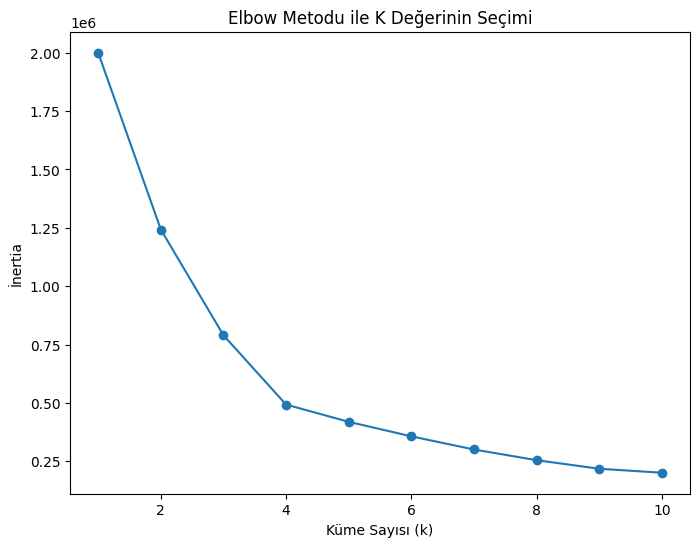

In [13]:
# Modeli eğitme
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Küme sayısını belirlemek için farklı k değerleri ile K-means uygulayın
k_range = range(1, 11)
inertia = [] # bu değerleri saklayacağız

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow yöntemini görselleştirin
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('İnertia')
plt.title('Elbow Metodu ile K Değerinin Seçimi')
plt.show()

In [14]:
# Elbow grafiğinden, eğrinin "dirsek" noktasını belirleyerek en uygun k değerini seçeceğiz. Bu, genellikle eğrinin düzleştiği noktadır, yani burada k=4 diyebiliriz.
k_optimal = 4

# K-means modelini oluşturun ve veriyi kümelere ayırın
kmeans = KMeans(n_clusters=k_optimal, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Küme merkezlerini ve etiketleri görüntüleyin
print(f'Küme Merkezleri:\n{kmeans.cluster_centers_}')
print(f'Küme Etiketleri:\n{df["Cluster"].value_counts()}')

Küme Merkezleri:
[[ 0.86282631  0.87129769]
 [-0.86803267  0.87131182]
 [ 0.87190619 -0.86797625]
 [-0.86052826 -0.87049093]]
Küme Etiketleri:
Cluster
3    251236
0    249749
1    249658
2    249357
Name: count, dtype: int64


Kümeleme sonuçlarını görselleştirmek adına birçok grafik denedim. Yorumlaması en kolay olan grafiğin bu olduğuna karar verip son halini bu şekilde bırakmak istedim. Görselleştirdikten sonra ortaya çıkan grafiği yorumladım ve müşteri segmentasyonunu gerçekleştirmiş oldum.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


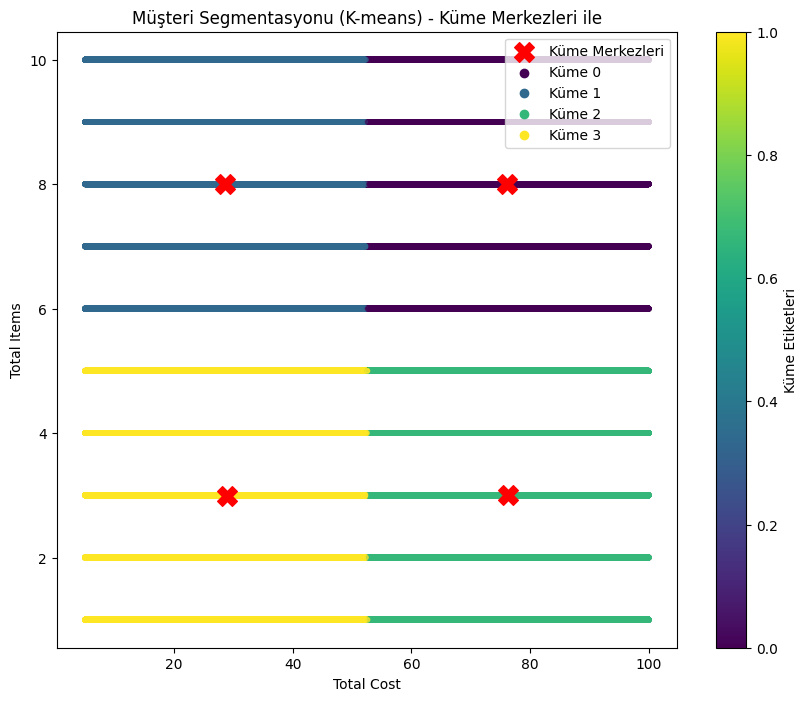

In [16]:
# Kümeleme sonuçlarını görselleştirin
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

# Müşteri verilerini plot et
scatter = plt.scatter(df['Total_Cost'], df['Total_Items'], c=df['Cluster'], cmap='viridis', s=10, alpha=0.6)

# Küme merkezlerini plot et
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)  # Orijinal ölçeklendirilmiş verilere geri dön
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Küme Merkezleri')

# Küme etiketlerini tanımla
colors = plt.cm.viridis(np.linspace(0, 1, 4))
cluster_labels = ['Küme 0', 'Küme 1', 'Küme 2', 'Küme 3']

# Renkleri ve etiketleri grafiğe ekle
for i, color in enumerate(colors):
    plt.scatter([], [], c=[color], label=cluster_labels[i], marker='o')

plt.xlabel('Total Cost')
plt.ylabel('Total Items')
plt.title('Müşteri Segmentasyonu (K-means) - Küme Merkezleri ile')
plt.colorbar(label='Küme Etiketleri')
plt.legend()
plt.show()

Küme 0:
Bu küme, yüksek toplam maliyet ve yüksek toplam ürün miktarı ile karakterize edilir. Müşteriler, çok sayıda ürün alıp, toplamda yüksek maliyetli alışverişler yapıyor olabilir. Bu tür müşterilere yönelik çapraz satış stratejileri ve toplu alım indirimleri etkili olabilir.

Küme 1:
Bu küme, düşük toplam maliyet ve yüksek toplam ürün miktarı ile tanımlanır. Müşteriler, maliyet açısından düşük olan ancak çok sayıda ürün satın alıyor olabilir. Bu tür müşterilere yönelik uygun fiyatlı veya ekonomik paket teklifler dikkat çekebilir.

Küme 2:
Bu küme, yüksek toplam maliyet ve düşük toplam ürün miktarı ile karakterize edilir. Müşteriler, genellikle az sayıda ürün alıp, yüksek maliyetli ürünler satın alıyor olabilir. Bu tür müşterilere yönelik özel teklifler ve promosyonlar, alışverişlerini artırabilir.

Küme 3:
Bu küme, düşük toplam maliyet ve düşük toplam ürün miktarı ile öne çıkar. Müşteriler, hem az maliyetli hem de az sayıda ürün satın alıyor olabilir. Bu tür müşteriler için maliyet etkili promosyonlar ve indirimler cazip olabilir.